# Pengenalan Natural Language Processing dengan NLTK dan Scikit-Learn

In [1]:
import sklearn
import nltk

print(sklearn.__version__)
print(nltk.__version__)

0.18.1
3.2.2


In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords, gutenberg
from nltk.stem.porter import PorterStemmer

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

## Mengakses Korpus

In [3]:
gutenberg.fileids()

[u'austen-emma.txt',
 u'austen-persuasion.txt',
 u'austen-sense.txt',
 u'bible-kjv.txt',
 u'blake-poems.txt',
 u'bryant-stories.txt',
 u'burgess-busterbrown.txt',
 u'carroll-alice.txt',
 u'chesterton-ball.txt',
 u'chesterton-brown.txt',
 u'chesterton-thursday.txt',
 u'edgeworth-parents.txt',
 u'melville-moby_dick.txt',
 u'milton-paradise.txt',
 u'shakespeare-caesar.txt',
 u'shakespeare-hamlet.txt',
 u'shakespeare-macbeth.txt',
 u'whitman-leaves.txt']

Kata-kata (_tokens_) dari salah satu buku

In [4]:
text = gutenberg.words('austen-sense.txt')
print(len(text))

141576


Mengambil teks mentah dari salah satu buku

In [5]:
print(gutenberg.raw('austen-sense.txt'))

[Sense and Sensibility by Jane Austen 1811]

CHAPTER 1


The family of Dashwood had long been settled in Sussex.
Their estate was large, and their residence was at Norland Park,
in the centre of their property, where, for many generations,
they had lived in so respectable a manner as to engage
the general good opinion of their surrounding acquaintance.
The late owner of this estate was a single man, who lived
to a very advanced age, and who for many years of his life,
had a constant companion and housekeeper in his sister.
But her death, which happened ten years before his own,
produced a great alteration in his home; for to supply
her loss, he invited and received into his house the family
of his nephew Mr. Henry Dashwood, the legal inheritor
of the Norland estate, and the person to whom he intended
to bequeath it.  In the society of his nephew and niece,
and their children, the old Gentleman's days were
comfortably spent.  His attachment to them all increased.
The constant attention 

## Statistik dari Teks

Mencari kata yang paling sering muncul

In [6]:
from collections import Counter
import re

text = gutenberg.raw('austen-sense.txt')
words = re.split('\W+', text.lower()) # split berdasarkan karakter non-alfanumerik
print(len(words))

120789


In [7]:
words

[u'',
 u'sense',
 u'and',
 u'sensibility',
 u'by',
 u'jane',
 u'austen',
 u'1811',
 u'chapter',
 u'1',
 u'the',
 u'family',
 u'of',
 u'dashwood',
 u'had',
 u'long',
 u'been',
 u'settled',
 u'in',
 u'sussex',
 u'their',
 u'estate',
 u'was',
 u'large',
 u'and',
 u'their',
 u'residence',
 u'was',
 u'at',
 u'norland',
 u'park',
 u'in',
 u'the',
 u'centre',
 u'of',
 u'their',
 u'property',
 u'where',
 u'for',
 u'many',
 u'generations',
 u'they',
 u'had',
 u'lived',
 u'in',
 u'so',
 u'respectable',
 u'a',
 u'manner',
 u'as',
 u'to',
 u'engage',
 u'the',
 u'general',
 u'good',
 u'opinion',
 u'of',
 u'their',
 u'surrounding',
 u'acquaintance',
 u'the',
 u'late',
 u'owner',
 u'of',
 u'this',
 u'estate',
 u'was',
 u'a',
 u'single',
 u'man',
 u'who',
 u'lived',
 u'to',
 u'a',
 u'very',
 u'advanced',
 u'age',
 u'and',
 u'who',
 u'for',
 u'many',
 u'years',
 u'of',
 u'his',
 u'life',
 u'had',
 u'a',
 u'constant',
 u'companion',
 u'and',
 u'housekeeper',
 u'in',
 u'his',
 u'sister',
 u'but',
 u'her'

Mencari sepuluh kata yang paling sering muncul

In [8]:
c = Counter(words)
c.most_common(10)

[(u'to', 4116),
 (u'the', 4105),
 (u'of', 3572),
 (u'and', 3491),
 (u'her', 2551),
 (u'a', 2092),
 (u'i', 2004),
 (u'in', 1979),
 (u'was', 1861),
 (u'it', 1757)]

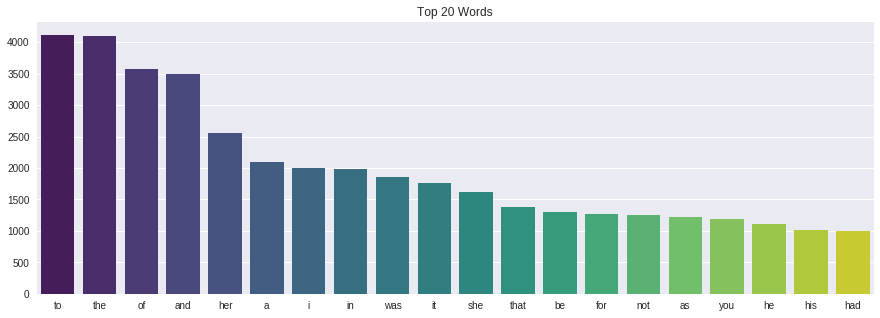

In [9]:
index, freq = zip(*c.most_common(20))
plt.figure(figsize=(15,5))
sns.barplot(index, freq, orient='v', palette='viridis')
plt.title('Top 20 Words')
plt.show()

## Stopwords

Kata yang paling sering muncul merupakan kata hubung yang sebetulnya tidak penting dalam kasus ini. Jadi, akan kita buang dengan cara sebagai berikut.

In [10]:
filtered = [w for w in words if not w in stopwords.words('english')]
print(len(filtered))

54042


In [11]:
c = Counter(filtered)
c.most_common(10)

[(u'elinor', 685),
 (u'could', 578),
 (u'marianne', 566),
 (u'mrs', 530),
 (u'would', 515),
 (u'said', 397),
 (u'every', 377),
 (u'one', 331),
 (u'much', 290),
 (u'must', 283)]

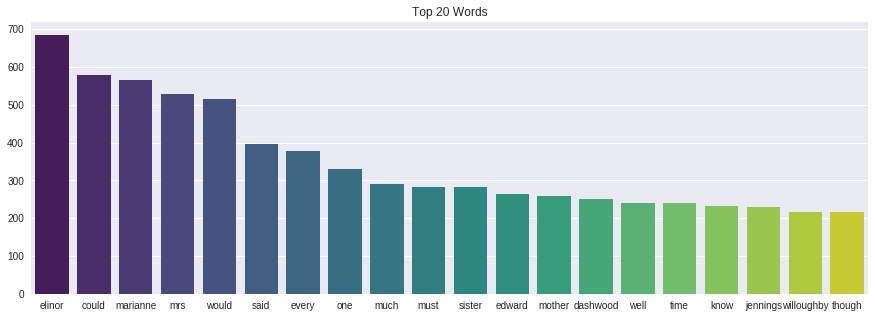

In [12]:
index, freq = zip(*c.most_common(20))
plt.figure(figsize=(15,5))
sns.barplot(index, freq, orient='v', palette='viridis')
plt.title('Top 20 Words')
plt.show()

## Stemming

In [13]:
stemmer = PorterStemmer()
stemmed = [stemmer.stem(w) for w in filtered]
stemmed

[u'',
 u'sens',
 u'sensibl',
 u'jane',
 u'austen',
 u'1811',
 u'chapter',
 u'1',
 u'famili',
 u'dashwood',
 u'long',
 u'settl',
 u'sussex',
 u'estat',
 u'larg',
 u'resid',
 u'norland',
 u'park',
 u'centr',
 u'properti',
 u'mani',
 u'gener',
 u'live',
 u'respect',
 u'manner',
 u'engag',
 u'gener',
 u'good',
 u'opinion',
 u'surround',
 u'acquaint',
 u'late',
 u'owner',
 u'estat',
 u'singl',
 u'man',
 u'live',
 u'advanc',
 u'age',
 u'mani',
 u'year',
 u'life',
 u'constant',
 u'companion',
 u'housekeep',
 u'sister',
 u'death',
 u'happen',
 u'ten',
 u'year',
 u'produc',
 u'great',
 u'alter',
 u'home',
 u'suppli',
 u'loss',
 u'invit',
 u'receiv',
 u'hous',
 u'famili',
 u'nephew',
 u'mr',
 u'henri',
 u'dashwood',
 u'legal',
 u'inheritor',
 u'norland',
 u'estat',
 u'person',
 u'intend',
 u'bequeath',
 u'societi',
 u'nephew',
 u'niec',
 u'children',
 u'old',
 u'gentleman',
 u'day',
 u'comfort',
 u'spent',
 u'attach',
 u'increas',
 u'constant',
 u'attent',
 u'mr',
 u'mr',
 u'henri',
 u'dashwood'

## Pembuatan Klaster Dokumen

Pada bagian ini, kita akan mencoba melakukan pengelompokan dokumen secara visual dengan menerapkan _Latent Semantic Analysis_ (LSA) pada dokumen berita yang terdiri dari dua kategori utama: agama dan olahraga.

In [14]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

categories = [
    'alt.atheism',
    'soc.religion.christian',
    'rec.sport.baseball',
    'rec.sport.hockey',
]
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories)

In [15]:
vect = TfidfVectorizer()
vectors = vect.fit_transform(newsgroups_train.data)

In [16]:
vect.vocabulary_

{u'221541': 1750,
 u'20057': 1610,
 u'divinely': 10784,
 u'schlegel': 25223,
 u'raining': 23444,
 u'foul': 13180,
 u'tilton': 28329,
 u'woods': 30661,
 u'pantheistic': 21436,
 u'mdbs': 18927,
 u'hanging': 14377,
 u'woody': 30662,
 u'cyprus': 9574,
 u'localized': 18093,
 u'sation': 25103,
 u'disobeying': 10662,
 u'734841689': 2932,
 u'worhip': 30680,
 u'sprague': 26743,
 u'chatter': 7749,
 u'hordes': 15034,
 u'voecking': 30014,
 u'unnecessarily': 29373,
 u'crossbar': 9345,
 u'immature': 15473,
 u'roadrunners': 24590,
 u'heintze': 14639,
 u'krattiger': 17345,
 u'saskatchewan': 25089,
 u'oceans': 20764,
 u'966': 3386,
 u'bratislava': 6629,
 u'appropriation': 4922,
 u'uncongenial': 29149,
 u'classifications': 8078,
 u'broward': 6784,
 u'screaming': 25333,
 u'dascenzo': 9725,
 u'four': 13191,
 u'disturb': 10762,
 u'sundday': 27420,
 u'grueling': 14162,
 u'dave_andreychuk': 9740,
 u'wooden': 30658,
 u'cannucks': 7282,
 u'wednesday': 30287,
 u'tamsun': 27777,
 u'andrei_lomakin': 4659,
 u'basi

In [17]:
vectors.shape

(2276, 31088)

In [18]:
svd = TruncatedSVD()
components = svd.fit_transform(vectors)

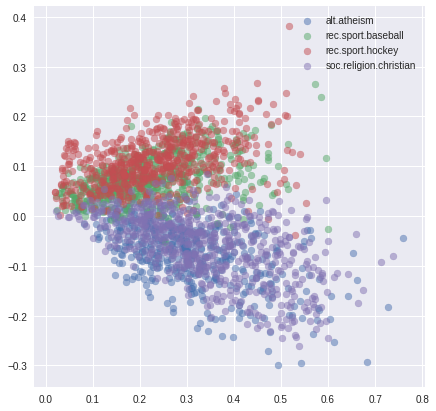

In [19]:
fig, ax = plt.subplots(figsize=(7, 7))
for category, group in zip(np.unique(newsgroups_train.target), newsgroups_train.target_names):
    mask = np.where(newsgroups_train.target == category)
    ax.scatter(components[mask,0], components[mask,1], alpha=0.5, label=group)
plt.legend()
plt.show()

Mencoba menggambarkan kembali scatter plot di atas. Kali ini dengan menggunakan binary Bag-of-Words (BoW). Apa yang dapat Anda simpulkan?

In [20]:
vect = CountVectorizer(binary=True)
vectors = vect.fit_transform(newsgroups_train.data)

svd = TruncatedSVD()
components = svd.fit_transform(vectors)

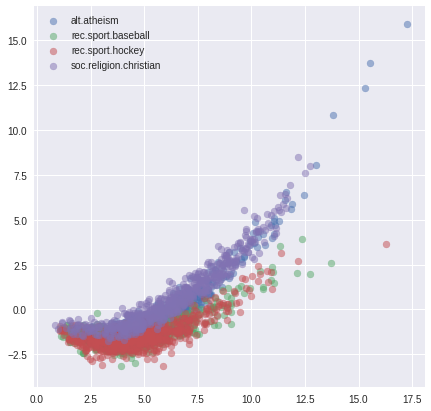

In [21]:
fig, ax = plt.subplots(figsize=(7, 7))
for category, group in zip(np.unique(newsgroups_train.target), newsgroups_train.target_names):
    mask = np.where(newsgroups_train.target == category)
    ax.scatter(components[mask,0], components[mask,1], alpha=0.5, label=group)
plt.legend()
plt.show()